In [103]:
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm
from pathlib import Path
import pandas as pd
import seaborn as sns

In [4]:
with open(Path.home() / 'Desktop' / 'disk2' / 'delta_amplitude_dict.pkl', 'rb') as f: delta_amplitude_dict = pickle.load(f)

In [5]:
delta_amplitude_dict

{'LFP power spectra during flashes -1-0s & 1-2s': {'area_VISpm_flash_toWhite_running_True_window_-1s-0s before flash': 6.7535257,
  'area_VISpm_flash_toWhite_running_True_window_1s-2s after flash': 6.7535257,
  'area_VISpm_flash_toBlack_running_True_window_-1s-0s before flash': 8.466824,
  'area_VISpm_flash_toBlack_running_True_window_1s-2s after flash': 8.466824,
  'area_VISpm_flash_toWhite_running_False_window_-1s-0s before flash': 1.37238,
  'area_VISpm_flash_toWhite_running_False_window_1s-2s after flash': 1.37238,
  'area_VISpm_flash_toBlack_running_False_window_-1s-0s before flash': 1.2926037,
  'area_VISpm_flash_toBlack_running_False_window_1s-2s after flash': 1.2926037,
  'area_VISp_flash_toWhite_running_True_window_-1s-0s before flash': 1.4658762,
  'area_VISp_flash_toWhite_running_True_window_1s-2s after flash': 1.4658762,
  'area_VISp_flash_toBlack_running_True_window_-1s-0s before flash': 1.5567575,
  'area_VISp_flash_toBlack_running_True_window_1s-2s after flash': 1.556757

In [25]:
df1_list = []
for key, val in delta_amplitude_dict['LFP power spectra during flashes -1-0s & 1-2s'].items():
    df1_list.append({'area': key.split('_')[1], 'flash': key.split('_')[3], 'running': key.split('_')[5], 'window': key.split('_')[7], 'ratio': val})
df1 = pd.DataFrame(df1_list)
df1

,area,flash,running,window,ratio
0,VISpm,toWhite,True,-1s-0s before flash,6.753526
1,VISpm,toWhite,True,1s-2s after flash,6.753526
2,VISpm,toBlack,True,-1s-0s before flash,8.466824
3,VISpm,toBlack,True,1s-2s after flash,8.466824
4,VISpm,toWhite,False,-1s-0s before flash,1.372380
5,VISpm,toWhite,False,1s-2s after flash,1.372380
6,VISpm,toBlack,False,-1s-0s before flash,1.292604
7,VISpm,toBlack,False,1s-2s after flash,1.292604
8,VISp,toWhite,True,-1s-0s before flash,1.465876
9,VISp,toWhite,True,1s-2s after flash,1.465876


In [107]:
def format_df(df, col1, col2):

    new_df = []

    for i in df[col1].unique():
        vals = {f'{col1}': i}
        for j in df[col2].unique():
            vals[f'{col2}_{j}']= df[(df[col1] == i) & (df[col2] == j)].ratio.mean()
        new_df.append(vals)
    new_df = pd.DataFrame(new_df)
    new_df = new_df.set_index(col1)

    return new_df

def plot_matrix(df,ax):
    mat = ax.matshow(df, cmap = cm.coolwarm)
    ax.set_xticks(ticks = [x for x in range(len(df.columns.to_list()))])
    ax.set_xticklabels(df.columns.to_list())
    ax.set_yticks(ticks = [x for x in range(len(df.index.to_list()))])
    ax.set_yticklabels(df.index.to_list())
    return mat

In [108]:
mat.colorbar.vmax

AttributeError: 'NoneType' object has no attribute 'vmax'

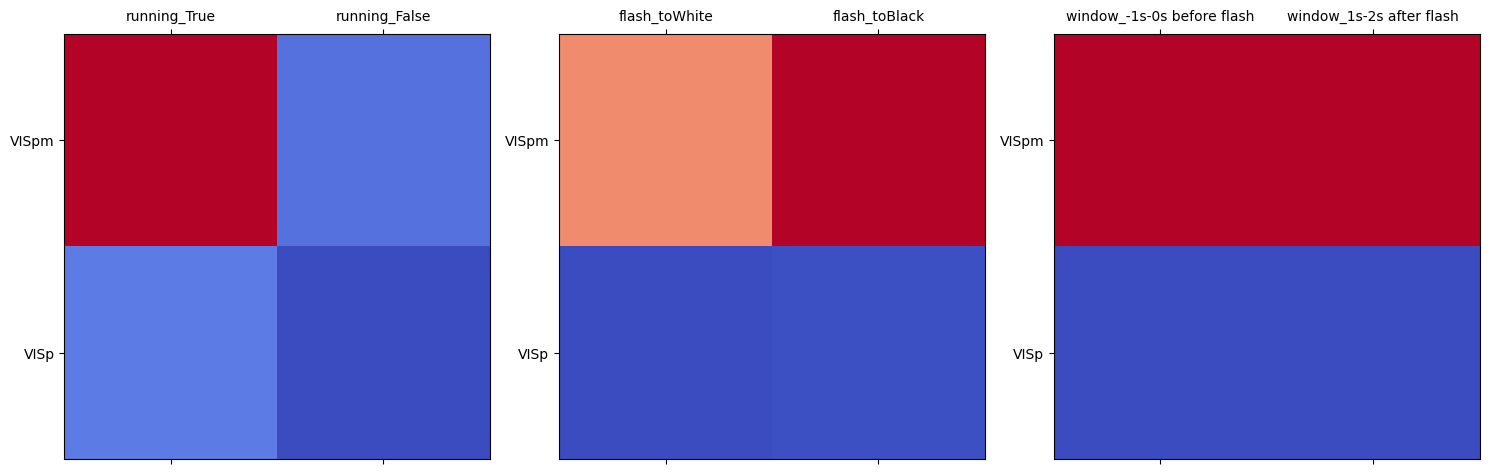

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,10))

mat = plot_matrix(format_df(df1, 'area', 'running'), ax[0])

plot_matrix(format_df(df1, 'area', 'flash'), ax[1])

plot_matrix(format_df(df1, 'area', 'window'), ax[2])

# plt.colorbar()

plt.tight_layout()
plt.show()

In [68]:
df2_list = []
for key, val in delta_amplitude_dict['LFP power spectra during flashes 0-1s & -1-2s'].items():
    df2_list.append({'area': key.split('_')[1], 'flash': key.split('_')[3], 'running': key.split('_')[5], 'window': key.split('_')[7], 'ratio': val})
df2 = pd.DataFrame(df2_list)
df2

,area,flash,running,window,ratio
0,VISpm,toWhite,True,0s-1s,0.846063
1,VISpm,toWhite,True,-1s-2s,0.846063
2,VISpm,toBlack,True,0s-1s,2.356893
3,VISpm,toBlack,True,-1s-2s,2.356893
4,VISpm,toWhite,False,0s-1s,0.542540
5,VISpm,toWhite,False,-1s-2s,0.542540
6,VISpm,toBlack,False,0s-1s,0.714721
7,VISpm,toBlack,False,-1s-2s,0.714721
8,VISp,toWhite,True,0s-1s,0.560554
9,VISp,toWhite,True,-1s-2s,0.560554


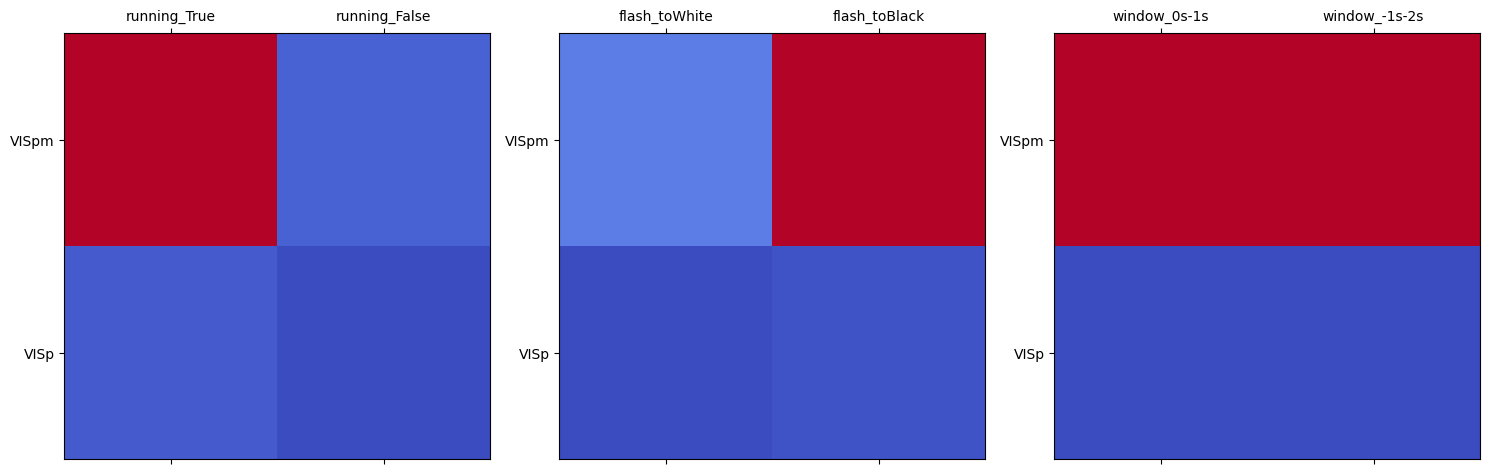

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,10))

plot_matrix(format_df(df2, 'area', 'running'), ax[0])

plot_matrix(format_df(df2, 'area', 'flash'), ax[1])

plot_matrix(format_df(df2, 'area', 'window'), ax[2])

# plt.colorbar()

plt.tight_layout()
plt.show()